Implementations

In [1]:
from implementations import *
from helpers import *
import matplotlib.pyplot as plt
import numpy as np

# 1- Load data

In [8]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data('dataset_to_release/', sub_sample=False)

In [17]:
print('Shapes of x_train :', x_train.shape)
print('Shapes of y_train :', y_train.shape)
print('Shapes of x_test :', x_test.shape)
print(x_train)

Shapes of x_train : (328135, 321)
Shapes of y_train : (328135,)
Shapes of x_test : (109379, 321)
[[5.3000000e+01 1.1000000e+01 1.1162015e+07 ... 1.0000000e+00
  1.0000000e+00 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2152015e+07 ... 1.0000000e+00
  1.0000000e+00 2.0000000e+00]
 [2.0000000e+01 1.0000000e+01 1.0202015e+07 ... 1.0000000e+00
  2.0000000e+00 2.0000000e+00]
 ...
 [3.9000000e+01 1.0000000e+01 1.0202015e+07 ... 2.0000000e+00
  2.0000000e+00 2.0000000e+00]
 [3.3000000e+01 1.2000000e+01 1.2302015e+07 ... 1.0000000e+00
  1.0000000e+00 2.0000000e+00]
 [3.2000000e+01 9.0000000e+00 9.1220150e+06 ... 1.0000000e+00
  1.0000000e+00 2.0000000e+00]]


# 2- Clean data

standardization

In [3]:
def standardize_(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    # Vérifiez si std_x est nul (zéro) avant de diviser
    non_zero_std_indices = std_x != 0
    x[:, non_zero_std_indices] = x[:, non_zero_std_indices] / std_x[non_zero_std_indices]
    return x, non_zero_std_indices

In [4]:
#Enlever premiere colonne x_train car rempli de nan
x_train = x_train[:,0:]

#Remplacer les nan par la mediane de chaque colonne
median = np.nanmedian(x_train, axis = 0)
x_train_filled = x_train
for col in range(x_train.shape[1]):
    x_train_filled[:,col] = np.nan_to_num(x_train[:,col], nan= median[col])

x_train_standardized, col_to_keep = standardize_(x_train_filled)

#Enlever les colonnes qui ont une std = 0
x_train_cleaned = x_train_standardized[:, col_to_keep]
print(x_train_cleaned.shape)

(300000, 31)


Correlation Matrix

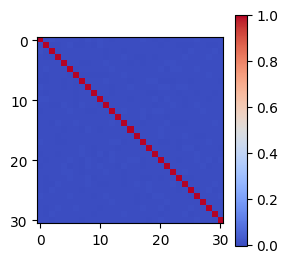

In [5]:
correlation_matrix = np.corrcoef(x_train_cleaned, rowvar = False)
plt.figure(figsize=(3, 3))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.show()

In [6]:
#Remplacer la partie triangulaire basse de la matrice par des 0
m = np.tril(np.ones(correlation_matrix.shape), k = 0).astype(bool)
correlation_matrix[m] = 0

Similar columns deletion

In [7]:
#Calcul des colonnes qui se ressemblent au dessus d'un threshold
threshold = 0.8

#Creation of a matrix True/False where True == When the correlation is above the treshold
mask = np.logical_and(np.abs(correlation_matrix) >= threshold, np.abs(correlation_matrix) < 1)
correlated_features = np.where(mask == True)

#indices_correlated has the indices of the correlated columns
indices_correlated = np.unique(correlated_features[0])

#Removes the correlated columns to x_train_cleaned
x_train_done = np.delete(x_train_cleaned, indices_correlated, axis = 1)
print(x_train_done.shape)

(300000, 31)


# 3- Split data

In [62]:
#We split x_train in a train part and a validation part
seed = 12
ratio = 0.8

# set seed
np.random.seed(seed)

#Number of elements in y
number = y_train.shape[0]

index = np.random.permutation(number)

#Separate into 2 categories at the split
split = int(np.floor(ratio * len(x_train1)))
train = index[:split]
test = index[split:]

#create the new datasets
x_tr = x_train1[train]
y_tr = y_train[train]
x_te = x_train1[test]
y_te = y_train[test]

# 4- First step w

### a) Least Squares

In [ ]:
'''
w_initial, loss = least_squares(y_train, x_train_final)
'''

### b) Ridge Regression

In [ ]:
'''
lambda_ = 0.1
w_initial, loss = ridge_regression(y_train, new_data, lambda_)
'''

### c) Looking for good hyperparameters  lambda_ for ridge regression

In [9]:
lambdas = np.linspace(0,0.5,50)
weights = []
losses_te = []

for lambda_ in lambdas:
    w,_ = ridge_regression(y_tr, x_tr, lambda_)
    weights.append(w)
    loss = compute_loss(y_te, x_te, w)
    losses_te.append(loss)

Smallest loss :  0.16701787935505852
Best lambda :  0.5


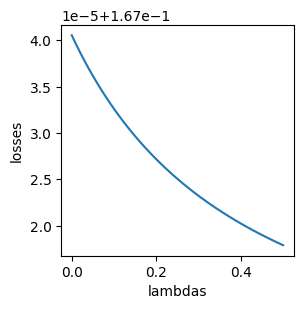

In [10]:
best_index = losses_te.index(min(losses_te))
print('Smallest loss : ',losses_te[best_index])
print('Best lambda : ',lambdas[best_index])
plt.figure(figsize = (3,3))
plt.xlabel('lambdas')
plt.ylabel('losses')
plt.plot(lambdas, losses_te)
plt.show()

In [11]:
w_initial = weights[best_index]

# 4- Gradient descent

### a) With Logistic Regression

In [ ]:
'''
nb_steps = 150
gamma = 0.01

for i in range(nb_steps):
    w_final, loss= logistic_regression(y_train, x_train_final, w_initial, gamma)
'''

### b) With Regularized Logistic Regression

In [ ]:
'''
nb_steps = 150
gamma = 0.01

for i in range(nb_steps):
    w_final, loss= reg_logistic_regression(y_train, new_data, w_initial, gamma, lambda_)
'''

### c) With search of best hyperprameters lambda and gamma for ridge regression AND regularized logistic regression

In [56]:
nb_steps = 20
lambdas = np.linspace(0,0.4,10)
gammas = np.linspace(0,1,10)
weights = np.zeros((len(lambdas),len(gammas), x_tr.shape[1]))
losses_te = np.zeros((len(lambdas),len(gammas)))

for i, lambda_ in enumerate(lambdas):
    
    for j, gamma in enumerate(gammas):
        
        w, _ = ridge_regression(y_tr, x_tr, lambda_)

        for step in range(nb_steps):

            w, loss = reg_logistic_regression(y_tr, x_tr, w, gamma, lambda_)

        weights[i,j] = w
        loss_te = compute_loss(y_te, x_te, w)
        losses_te[i][j] = loss_te           

In [57]:
best_index = np.unravel_index(np.argmin(losses_te), losses_te.shape)
row_index, col_index = best_index
best_weight = weights[row_index][col_index]
print('Best lambda : ', lambdas[row_index])
print('Best gamma : ', gammas[col_index])
w_final = best_weight

Best lambda :  0.044444444444444446
Best gamma :  0.4444444444444444


In [63]:
w, _ = ridge_regression(y_tr, x_tr, 0.0444)
w_final, loss = reg_logistic_regression(y_tr, x_tr, w, 0.44, 0.044)

# 5- Test

Prepare x_test

In [ ]:
x_test = x_test[:,0:]

#Remplacer les nan par la mediane de chaque colonne
median = np.nanmedian(x_test, axis = 0)
x_test_filled = x_test
for col in range(x_test.shape[1]):
    x_test_filled[:,col] = np.nan_to_num(x_test[:,col], nan= median[col])

x_test_standardized, _ = standardize_(x_test_filled)

#Enlever les colonnes qui ont une std = 0
x_test_cleaned = x_test_standardized[:, col_to_keep]


x_test_final = np.delete(x_test_cleaned, indices_correlated, axis = 1)

print(x_test_final.shape)

Finding y predicted with x_test and w

In [65]:
#y_pred_proba has the proba of each y to be 1 or -1
y_pred_proba = sigmoid (np.dot(x_test1, w_final))

#If proba > 0.5, y becomes 1, else -1
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)
y_pred[y_pred == 0] = -1

# 6- Creating the submission file

In [66]:
name = 'test_7.csv '
create_csv_submission(test_ids, y_pred, name)

### idees
- faire extension polynomiale (si on enleve bcp de colonnes grace aux outliers ca prend peutetre pas trop de temps)
- sortir les outliers du dataset
- enlever les colonnes avec trop de nan ?

### Toutes les fonctions utiles pour le cleaning

In [84]:
def standardize_(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    # Vérifiez si std_x est nul (zéro) avant de diviser
    non_zero_std_indices = std_x != 0
    x[:, non_zero_std_indices] = x[:, non_zero_std_indices] / std_x[non_zero_std_indices]
    return x, non_zero_std_indices

def nan_to_median(data):
    #Remplacer les nan par la mediane de chaque colonne
    median = np.nanmedian(data, axis = 0)
    new_data = data
    for col in range(data.shape[1]):
        new_data[:,col] = np.nan_to_num(data[:,col], nan= median[col])
    return new_data

def remove_zero_std_columns(data):
    std_data, col_to_keep=standardize_(data)
    clean_std_data=std_data[:, col_to_keep]
    return clean_std_data, col_to_keep

def remove_low_variance_features(data, threshold=0.1):
    # Calculate the variance of each feature using NumPy
    feature_variances = np.var(data, axis=1)

    # Identify features with variance above the threshold
    selected_feature_indices = np.where(feature_variances >= threshold)
    selected_features = data[:, selected_feature_indices]

    return selected_features, selected_feature_indices

def remove_high_correlation_feature(data, threshold=0.8):
    correlation_matrix = np.corrcoef(data, rowvar = False)
    plt.figure(figsize=(3, 3))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.show()
    #Remplacer la partie triangulaire basse de la matrice par des 0
    m = np.tril(np.ones(correlation_matrix.shape), k = 0).astype(bool)
    correlation_matrix[m] = 0
    #Creation of a matrix True/False where True == When the correlation is above the treshold
    mask = np.logical_and(np.abs(correlation_matrix) >= threshold, np.abs(correlation_matrix) < 1)
    correlated_features = np.where(mask == True)

    #indices_correlated has the indices of the correlated columns
    col_to_delete = np.unique(correlated_features[0])

    #Removes the correlated columns to x_train_cleaned
    clean_data = np.delete(data, col_to_delete, axis = 1)
    return clean_data, col_to_delete
    

def remove_outlier_rows(data):
    # Calculate the quartiles for each row
    Q1 = np.percentile(data, 5, axis=1)
    Q3 = np.percentile(data, 95, axis=1)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows based on bounds
    filtered_data = data[(data.min(axis=1) >= lower_bound) | (data.max(axis=1) <= upper_bound), :]
    rows_to_keep = (data.min(axis=1) >= lower_bound) | (data.max(axis=1) <= upper_bound)
    
    return filtered_data, rows_to_keep
'''
def replace_remaining_outlier_values (data, threshold=1.5):
    medians = np.median(data, axis=0)
    for i in range(data.shape[1]):
        col = data[:, i]
        iqr = np.percentile(col, 75) - np.percentile(col, 25)
        lower_bound = np.percentile(col, 25) - threshold * iqr
        upper_bound = np.percentile(col, 75) + threshold * iqr
        outliers = (col < lower_bound) | (col > upper_bound)
        data[outliers, i] = medians[i]
    return data

def replace_remaining_outlier_values(data, threshold=1.5):
    #medians = np.median(data, axis=0)
    data_copy = np.copy(data)
    for i in range(data.shape[1]):
        col = data_copy[:, i]
        median = np.median(col)
        Q1 = np.percentile(col, 5)
        Q3 = np.percentile(col, 95)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        #outliers = (col < lower_bound) | (col > upper_bound)
        #data[outliers, i] = medians[i]
        col[col < lower_bound] = median
        col[col > upper_bound] = median
        
    return data_copy
'''

def rep(data, threshold = 2):
    data_copy = np.copy(data)
    medians = np.median(data_copy, axis = 0)
    q1 = np.percentile(data_copy, 25, axis = 0)
    q3 = np.percentile(data_copy, 75, axis = 0)
    iqr = q3 - q1
    low_thresh = q1 - threshold * iqr
    up_thresh = q3 + threshold * iqr
    for i in range(data_copy.shape[1]):
        data_copy[:, i] = np.where(data_copy[:,i] < low_thresh[i], medians[i], data_copy[:,i])
        data_copy[:, i] = np.where(data_copy[:,i] > up_thresh[i], medians[i], data_copy[:,i])
    return data_copy

### Cleaning de xtrain et xtest en même temps

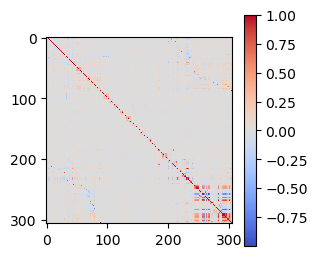

[[-0.00987575  0.59566875  0.00578998 ... -0.37611492 -0.28037596
   0.02207133]
 [-0.00987575 -1.67878539  0.00578998 ...  3.03385097 -0.28037596
   0.02207133]
 [-0.00987575  0.59566875  0.00578998 ... -0.37611492  0.27974268
   0.02207133]
 ...
 [-0.00987575 -1.67878539  0.00578998 ...  0.05013082  0.27974268
   0.02207133]
 [-0.00987575 -1.67878539  0.00578998 ... -0.37611492 -0.28037596
   0.02207133]
 [-0.00987575  0.59566875  0.00578998 ... -0.37611492 -0.28037596
   0.02207133]]
991674
(328135,)


In [89]:
#premiere colonne remplie de Nan (supprimer d autres des premieres colonnes)
x_train1 = x_train[:,9:]
x_test1 = x_test[:,9:]

#remplacer Nan par mediane (estce qu on a le droit de faire ca dans xtest? estce que cest une bonne idee ?)
x_train1=nan_to_median(x_train1)
x_test1=nan_to_median(x_test1)

#standardization of test
x_test1, _ = standardize_(x_test1)

#enlever les colonnes qui ont une std nulle
x_train1, col_to_keep=remove_zero_std_columns(x_train1)
x_test1= x_test1[:, col_to_keep]

#enlever les colonnes avec trop grande correlation
x_train1, col_to_delete=remove_high_correlation_feature(x_train1)
x_test1= np.delete(x_test1, col_to_delete, axis = 1)

#enlever les lignes de outliers
#x_train1, rows_to_keep =remove_outlier_rows(x_train1)

print(x_train1)
#remplacer les outliers dans les colonnes qu'il reste avec la medianne aussi (le faire pour x_test?)
x_train2=replace_remaining_outlier_values(x_train1)
x_test1 = replace_remaining_outlier_values(x_test1)

print(np.count_nonzero(x_train1 !=x_train2))
#y_train1 = y_train[rows_to_keep]
print(y_train.shape)

### Fonctions utiles pour améliorer le modèle

In [38]:
#fonctions utiles pour améliorer le modèle
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    poly=np.zeros((x.shape[0], degree+1))
    for i in range (x.shape[0]):
        for j in range (degree+1):
            poly[i, j]=x[i]**j
    return poly